# Segmentation of Indian Traffic

In [1]:
import math
from PIL import Image, ImageDraw
from PIL import ImagePath
import pandas as pd
import os
import datetime
from os import path
from tqdm import tqdm
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib

In [2]:
!pip install tensorflow==2.2.0

     |████████████████████████████████| 516.2 MB 2.9 kB/s 
     |████████████████████████████████| 2.9 MB 30.1 MB/s 
     |████████████████████████████████| 3.0 MB 35.8 MB/s 
     |████████████████████████████████| 454 kB 46.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalli

In [3]:

!pip install keras==2.3.1

     |████████████████████████████████| 377 kB 4.9 MB/s 
     |████████████████████████████████| 50 kB 6.9 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


<pre>
1. You can download the data from this link, and extract it

2. All your data will be in the folder "data" 

3. Inside the data you will be having two folders

|--- data
|-----| ---- images
|-----| ------|----- Scene 1
|-----| ------|--------| ----- Frame 1 (image 1)
|-----| ------|--------| ----- Frame 2 (image 2)
|-----| ------|--------| ----- ...
|-----| ------|----- Scene 2
|-----| ------|--------| ----- Frame 1 (image 1)
|-----| ------|--------| ----- Frame 2 (image 2)
|-----| ------|--------| ----- ...
|-----| ------|----- .....
|-----| ---- masks
|-----| ------|----- Scene 1
|-----| ------|--------| ----- json 1 (labeled objects in image 1)
|-----| ------|--------| ----- json 2 (labeled objects in image 1)
|-----| ------|--------| ----- ...
|-----| ------|----- Scene 2
|-----| ------|--------| ----- json 1 (labeled objects in image 1)
|-----| ------|--------| ----- json 2 (labeled objects in image 1)
|-----| ------|--------| ----- ...
|-----| ------|----- .....
</pre>

In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [5]:
!unzip '/content/gdrive/MyDrive/data.zip'

Streaming output truncated to the last 5000 lines.
  inflating: data/images/377/frame28699_leftImg8bit.jpg  
  inflating: data/images/377/frame28808_leftImg8bit.jpg  
  inflating: data/images/377/frame29080_leftImg8bit.jpg  
  inflating: data/images/377/frame29271_leftImg8bit.jpg  
  inflating: data/images/377/frame29435_leftImg8bit.jpg  
  inflating: data/images/377/frame29653_leftImg8bit.jpg  
  inflating: data/images/377/frame29817_leftImg8bit.jpg  
  inflating: data/images/377/frame30062_leftImg8bit.jpg  
  inflating: data/images/377/frame30199_leftImg8bit.jpg  
  inflating: data/images/377/frame3039_leftImg8bit.jpg  
  inflating: data/images/377/frame30417_leftImg8bit.jpg  
  inflating: data/images/377/frame30499_leftImg8bit.jpg  
  inflating: data/images/377/frame30608_leftImg8bit.jpg  
  inflating: data/images/377/frame30744_leftImg8bit.jpg  
  inflating: data/images/377/frame30908_leftImg8bit.jpg  
  inflating: data/images/377/frame31126_leftImg8bit.jpg  
  inflating: data/imag

# Task 1: Preprocessing

## 1. Get all the file name and corresponding json files

In [6]:
def return_file_names_df(root_dir):
    # write the code that will create a dataframe with two columns ['images', 'json']
    # the column 'image' will have path to images
    # the column 'json' will have path to json files
    path_image = root_dir + '/images'
    image_sub_folders = os.listdir(path_image)

    images = []
    json = []

    for image in image_sub_folders:
        for ele in os.listdir(os.path.join(path_image, image)):
            images.append(os.path.join(path_image, image, ele))

    #for the paths of images obtained, we'll replace the portion after the first _ of the path of image
    #and add '_gtFine_polygons.json' to it
    #also replacing the images/ with mask/
    #this will give us our json file path
    for ele in images:
        ele = ele.replace('/images/', '/mask/')
        json_file_name = ele.split('_')[0] + '_gtFine_polygons.json'
        json.append(json_file_name)

    data_df = pd.DataFrame({'image': images, 'json': json})

    return data_df

In [7]:
data_df = return_file_names_df('data')
data_df.head()

image  \
0   data/images/369/frame0246_leftImg8bit.jpg   
1  data/images/275/frame12935_leftImg8bit.jpg   
2  data/images/275/frame15799_leftImg8bit.jpg   
3  data/images/275/frame17353_leftImg8bit.jpg   
4   data/images/275/frame4020_leftImg8bit.jpg   

                                            json  
0   data/mask/369/frame0246_gtFine_polygons.json  
1  data/mask/275/frame12935_gtFine_polygons.json  
2  data/mask/275/frame15799_gtFine_polygons.json  
3  data/mask/275/frame17353_gtFine_polygons.json  
4   data/mask/275/frame4020_gtFine_polygons.json

> If you observe the dataframe, we can consider each row as single data point, where first feature is image and the second feature is corresponding json file

In [ ]:

def grader_1(data_df):
    for i in data_df.values:
        if not (path.isfile(i[0]) and path.isfile(i[1]) and i[0][12:i[0].find('_')]==i[1][10:i[1].find('_')]):
            return False
    return True

In [ ]:
grader_1(data_df)

True

In [ ]:
data_df.shape

(4008, 2)

## 2. Structure of sample Json file

<img src='https://i.imgur.com/EfR5KmI.png' width="200" height="100">

* Each File will have 3 attributes
    * imgHeight: which tells the height of the image
    * imgWidth: which tells the width of the image
    * objects: it is a list of objects, each object will have multiple attributes,
        * label: the type of the object
        * polygon: a list of two element lists, representing the coordinates of the polygon

#### Compute the unique labels

Let's see how many unique objects are there in the json file.
to see how to get the object from the json file please check <a href='https://www.geeksforgeeks.org/read-json-file-using-python/'>this blog </a>

In [8]:
def return_unique_labels(data_df):
    # for each file in the column json
    #       read and store all the objects present in that file
    # compute the unique objects and retrun them
    # if open any json file using any editor you will get better sense of it
    unique_labels = set()

    for i in data_df.json:

        with open(i, 'r') as f:

            object_dict = json.load(f)['objects']

            for j in object_dict:
                unique_labels.add(j['label'])
    return unique_labels

In [9]:
unique_labels = return_unique_labels(data_df)

<img src='https://i.imgur.com/L4QH6Tp.png'>

In [10]:
label_clr = {'road':10, 'parking':20, 'drivable fallback':20,'sidewalk':30,'non-drivable fallback':40,'rail track':40,\
                        'person':50, 'animal':50, 'rider':60, 'motorcycle':70, 'bicycle':70, 'autorickshaw':80,\
                        'car':80, 'truck':90, 'bus':90, 'vehicle fallback':90, 'trailer':90, 'caravan':90,\
                        'curb':100, 'wall':100, 'fence':110,'guard rail':110, 'billboard':120,'traffic sign':120,\
                        'traffic light':120, 'pole':130, 'polegroup':130, 'obs-str-bar-fallback':130,'building':140,\
                        'bridge':140,'tunnel':140, 'vegetation':150, 'sky':160, 'fallback background':160,'unlabeled':0,\
                        'out of roi':0, 'ego vehicle':170, 'ground':180,'rectification border':190,\
                   'train':200}

In [ ]:
def grader_2(unique_labels):
    if (not (set(label_clr.keys())-set(unique_labels))) and len(unique_labels) == 40:
        print("True")
    else:
        print("Flase")

grader_2(unique_labels)

True


<pre>
* here we have given a number for each of object types, if you see we are having 21 different set of objects
* Note that we have multiplies each object's number with 10, that is just to make different objects look differently in the segmentation map
* Before you pass it to the models, you might need to devide the image array /10.
</pre>

## 3. Extracting the polygons from the json files

In [11]:
def get_poly(file):
    # this function will take a file name as argument
    
    # it will process all the objects in that file and returns
    
    # label: a list of labels for all the objects label[i] will have the corresponding vertices in vertexlist[i]
    # len(label) == number of objects in the image
    
    # vertexlist: it should be list of list of vertices in tuple formate 
    # ex: [[(x11,y11), (x12,y12), (x13,y13) .. (x1n,y1n)]
    #     [(x21,y21), (x22,y12), (x23,y23) .. (x2n,y2n)]
    #      .....
    #     [(xm1,ym1), (xm2,ym2), (xm3,ym3) .. (xmn,ymn)]]
    # len(vertexlist) == number of objects in the image
    
    # * note that label[i] and vertextlist[i] are corresponds to the same object, one represents the type of the object
    # the other represents the location
    
    # width of the image
    # height of the image
    with open(file, 'r') as f:

        json_file = json.load(f)

        h = json_file['imgHeight']
        w = json_file['imgWidth']
        objects = json_file['objects']

        label = []
        vertexlist = []
        for i in objects:

            labels = i['label']
            list_of_vertices = i['polygon']
            list_of_vertices = list(map(tuple, list_of_vertices))

            label.append(i['label'])
            vertexlist.append(list_of_vertices)
    return w, h, label, vertexlist

In [12]:
def grader_3(file):
    w, h, labels, vertexlist = get_poly(file)
    print(len((set(labels)))==18 and len(vertexlist)==227 and w==1920 and h==1080 \
          and isinstance(vertexlist,list) and isinstance(vertexlist[0],list) and isinstance(vertexlist[0][0],tuple) )

grader_3('data/mask/201/frame0029_gtFine_polygons.json')

True


## 4. Creating Image segmentations by drawing set of polygons

### Example

(28, 28, 3)
[[0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0]
 [0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0]
 [0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 

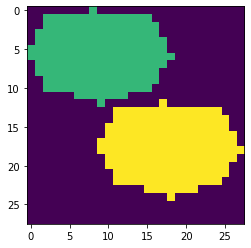

In [13]:
import math 
from PIL import Image, ImageDraw 
from PIL import ImagePath  
side=8
x1 = [ ((math.cos(th) + 1) *9, (math.sin(th) + 1) * 6) for th in [i * (2 * math.pi) / side for i in range(side)] ]
x2 = [ ((math.cos(th) + 2) *9, (math.sin(th) + 3) *6) for th in [i * (2 * math.pi) / side for i in range(side)] ]

img = Image.new("RGB", (28,28))
img1 = ImageDraw.Draw(img)
# please play with the fill value
# writing the first polygon
img1.polygon(x1, fill =20)
# writing the second polygon
img1.polygon(x2, fill =30)

img=np.array(img)
# note that the filling of the values happens at the channel 1, so we are considering only the first channel here
plt.imshow(img[:,:,0])
print(img.shape)
print(img[:,:,0]//10)
im = Image.fromarray(img[:,:,0])
im.save("test_image.png")

In [14]:
def compute_masks(data_df):
    # after you have computed the vertexlist plot that polygone in image like this
    
    # img = Image.new("RGB", (w, h))
    # img1 = ImageDraw.Draw(img)
    # img1.polygon(vertexlist[i], fill = label_clr[label[i]])
    
    # after drawing all the polygons that we collected from json file, 
    # you need to store that image in the folder like this "data/output/scene/framenumber_gtFine_polygons.png"
    
    # after saving the image into disk, store the path in a list
    # after storing all the paths, add a column to the data_df['mask'] ex: data_df['mask']= mask_paths
    paths = []
    if not os.path.isdir('data/output'):
        os.mkdir('data/output')

    for _, row in data_df.iterrows():

        json_file_path = row.json
        #getting the w, h, labels, and vertices
        w, h, label, vertexlist = get_poly(json_file_path)

        #create a new image
        img = Image.new("RGB", size=(w, h))
        img1 = ImageDraw.Draw(img)

        #now for each of the lable and its corresponding vertices, we will draw it on image
        for label, poly in zip(label, vertexlist):
            if len(poly) < 2:
                continue
            img1.polygon(poly, fill=label_clr[label])

        #getting the path to save it
        img_path = json_file_path.replace('/mask/', '/output/').replace('.json', '.png')
        img_dir = '/'.join(img_path.split('/')[:3])

        if not os.path.isdir(img_dir):
            os.mkdir(img_dir)

        #extracting only the first channel of image
        img = np.array(img)
        img2 = Image.fromarray(img[:, :, 0])
        img2.save(img_path)
        paths.append(img_path)

    data_df['mask'] = paths

    return data_df

In [15]:
data_df = compute_masks(data_df)
data_df.head()

image  \
0   data/images/369/frame0246_leftImg8bit.jpg   
1  data/images/275/frame12935_leftImg8bit.jpg   
2  data/images/275/frame15799_leftImg8bit.jpg   
3  data/images/275/frame17353_leftImg8bit.jpg   
4   data/images/275/frame4020_leftImg8bit.jpg   

                                            json  \
0   data/mask/369/frame0246_gtFine_polygons.json   
1  data/mask/275/frame12935_gtFine_polygons.json   
2  data/mask/275/frame15799_gtFine_polygons.json   
3  data/mask/275/frame17353_gtFine_polygons.json   
4   data/mask/275/frame4020_gtFine_polygons.json   

                                             mask  
0   data/output/369/frame0246_gtFine_polygons.png  
1  data/output/275/frame12935_gtFine_polygons.png  
2  data/output/275/frame15799_gtFine_polygons.png  
3  data/output/275/frame17353_gtFine_polygons.png  
4   data/output/275/frame4020_gtFine_polygons.png

In [16]:
#daving the final dataframe to a csv file
data_df.to_csv('preprocessed_data.csv', index=False)

# Task 2: Applying Unet to segment the images

<pre>
* please check the paper: https://arxiv.org/abs/1505.04597

* <img src='https://i.imgur.com/rD4yP7J.jpg' width="500">

* As a part of this assignment we won't writingt this whole architecture, rather we will be doing transfer learning

* please check the library <a hreaf='https://github.com/qubvel/segmentation_models'>https://github.com/qubvel/segmentation_models</a>

* You can install it like this "pip install -U segmentation-models==0.2.1", even in google colab you can install the    same with "!pip install -U segmentation-models==0.2.1" 

* Check the reference notebook in which we have solved one end to end case study of image forgery detection using same  unet

* The number of channels in the output will depend on the number of classes in your data, since we know that we are having 21 classes, the number of channels in the output will also be 21

* <strong>This is where we want you to explore, how do you featurize your created segmentation map note that the original map will be of (w, h, 1) and the output will be (w, h, 21) how will you calculate the loss</strong>, you can check the examples in segmentation github

* please use the loss function that is used in the refence notebooks

</pre>

In [17]:
#installing the segmentation module
!pip install git+https://github.com/qubvel/segmentation_models

  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-jge0dk59
  Running command git clone -q https://github.com/qubvel/segmentation_models /tmp/pip-req-build-jge0dk59
  Running command git submodule update --init --recursive -q
  Created wheel for segmentation-models: filename=segmentation_models-1.0.1-py3-none-any.whl size=33810 sha256=a3518052621c478907da62345656825efa3b5342b8c6823b8353b101d38a0a07
  Stored in directory: /tmp/pip-ephem-wheel-cache-5barwlby/wheels/02/cd/18/61c0bbb8766acfec68f9d20618886b7b38dfeeb95865b6ba00
Successfully built segmentation-models


### Task 2.1: Dice loss

<pre>
* Explain the Dice loss
* 1. Write the formualtion
* 2. Range of the loss function
* 3. Interpretation of loss function
* 4. Write your understanding of the loss function, how does it helps in segmentation
</pre>

<font size = 4><b><u>Dice Loss</u>:</b></font>
The core idea of Dice Loss comes from the Dice Score. For image segmentation tasks, we effectively want to calculate the overlap of each predicted pixel with the actual pixel. To quantify this overlap, a metric called Dice Coefficient is often used. <br>
Dice Coefficient can be written as: <br><br>
$Dice Coefficient = 2|A∩B| / (|A|+|B|)$
<br><br>
From the above formula we can see that the numerator expresses the total number of pixel ovelaps between the actual and predicted pixels of a single class, and the denominator represents the sum of the total pixels of actual and predicted segment of same class.<br>
Our goal is to maximize this score.
<br><br>
The Dice loss is inherited from the dice coefficient itself, and in the case of Dice Loss - we try to minimize the $(1-Dice)$ Score.
It is also called as a Soft Dice Loss because instead of using the actual labels, we are use the probability values of the predicted class.<br>
If both the actual and predicted pixels overlap perfectly we get a Dice Score of 1 and a Dice Loss of 0. If they don't overlap at all, the Dice Score Comes out to be 0.
<br>If we analyse it more we see that our ultimate end result is to segment the image as closely as the actual segmentation. This means that we would ideally want a 0 loss which corresponds to perfect overlab.<br>
The numerator of Dice Coefficient denotes the overlap of pixels of predicted and actual class locally, where as the denominator tells about the pixels of each of them on a global scale. Thus this helps us to effectively minimize the loss both locally and globally.<br>
<br>This loss function is better than other loss functions because say if we want to do segmentation of particular object, we would require the boundaries of the predicted and actual to be perfectly overlapping, and this we can achieve using the Dice Loss. <br>
Simple Cross-Entropy fails when there is a huge imabalance between classes as classification/proper identification of the majority class will effectively reduce the loss, but this in no way suggests the model's actual segmentation ability. This is why Dice Loss is preferred over here.





In [18]:
import tensorflow as tf
from tensorflow import keras
import segmentation_models as sm
from segmentation_models.metrics import iou_score
from segmentation_models import Unet
from sklearn.model_selection import train_test_split
tf.keras.backend.set_image_data_format('channels_last')
import imgaug.augmenters as iaa
import cv2
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
%load_ext tensorboard
import os
import datetime

Using TensorFlow backend.


Segmentation Models: using `keras` framework.


### Task 2.2: Training Unet


<pre>
* Split the data into 80:20.
* Train the UNET on the given dataset and plot the train and validation loss.
* As shown in the reference notebook plot 20 images from the test data along with its segmentation map, predicted map.
</pre>

In [ ]:
#splitting the data into train and validation
df_train, df_val = train_test_split(data_df, test_size = 0.20 , random_state = 33)

### Data Preparation

In [ ]:
#defining the augmentors
def augmentation():
    '''
    Function to get the augmentors
    '''
    aug1 = iaa.Fliplr(1)
    aug2 = iaa.DirectedEdgeDetect(alpha=(0.8), direction=(1.0))
    aug3 = iaa.Emboss(alpha=1, strength=1)
    aug4 = iaa.Sharpen(alpha=1, lightness=1)

    return aug1, aug2, aug3, aug4

aug1, aug2, aug3, aug4 = augmentation()

#we need to prepare the dataset now
def normalize_image(img):
    img = img / 255.

class Dataset:

    class_labels = list(set(label_clr.values()))

    def __init__(self, images_paths, training=True, w=512, h=512):

        self.original_image = images_paths.image.values
        self.output_image = images_paths['mask'].values
        self.classes = self.class_labels
        self.w = w
        self.h = h
        self.training = training

    def __getitem__(self, i):

        input_image = cv2.imread(self.original_image[i], cv2.IMREAD_UNCHANGED)
        mask_image = cv2.imread(self.output_image[i], cv2.IMREAD_UNCHANGED)
        input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

        #resizing both the images
        input_image = cv2.resize(input_image, (self.w, self.h),
                                 interpolation=cv2.INTER_AREA)
        mask_image = cv2.resize(mask_image, (self.w, self.h),
                                interpolation=cv2.INTER_AREA)
        
        #image augmentation
        aug_chooser = np.random.uniform(0, 1)

        aug_list = [aug1, aug2, aug3, aug4]

        if aug_chooser < 0.25:
            aug = 0
        elif aug_chooser < 0.5:
            aug = 1
        elif aug_chooser < 0.75:
            aug = 2
        else:
            aug = 3
        
        if self.training:
            input_image = aug_list[aug].augment_image(input_image)
            mask_image = aug_list[aug].augment_image(mask_image)

        #onehotencoding the masked image
        mask_image_onehot = [(mask_image == label) for label in self.classes]
        mask_image_onehot = np.stack(mask_image_onehot,axis=-1).astype('float64')

        #normalizing the values of image
        input_image = input_image / 255.

        return input_image, mask_image_onehot

    def __len__(self):
        return len(self.original_image)

In [ ]:
#Now we need to make a datagenerator
class DataLoader(tf.keras.utils.Sequence):
    def __init__(self, dataset, batch_size):
        self.dataset = dataset
        self.batch_size = batch_size

    def __getitem__(self, i):
        # collect batch data
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])

        batch = [np.stack(sample, axis=0) for sample in zip(*data)]
        return tuple(batch)

    def __len__(self):
        return len(self.dataset) // self.batch_size

In [ ]:
train_dataset = Dataset(df_train)
val_dataset = Dataset(df_val,training = False)

batch_size = 4
train_dataloader = DataLoader(train_dataset, batch_size)
val_dataloader = DataLoader(val_dataset, batch_size)

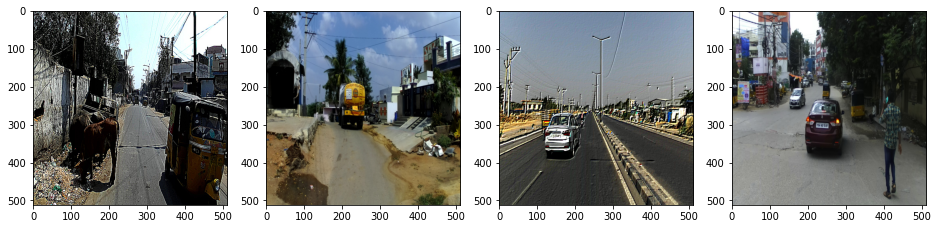

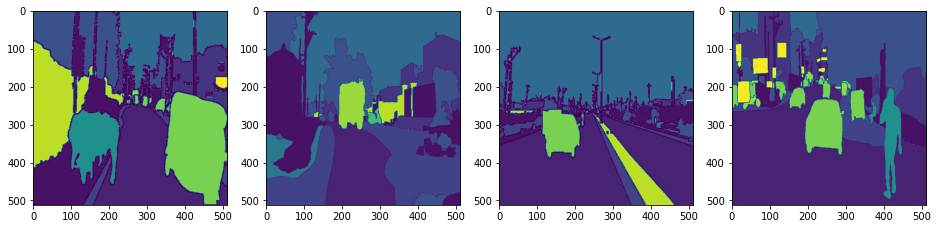

In [ ]:
#lets try to visualize some of the train data pics and their corresponding masks
train_images, mask_images = train_dataloader[10]
plt.figure(figsize=(16, 5))
plt.title("Train Images")
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(train_images[i])
plt.figure(figsize=(16, 5))
plt.title("Train Masks")
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(np.argmax(mask_images[i], axis=-1))

In [ ]:
#defining our model
#using unet model with pretrained resnet34 as our encoder
tf.keras.backend.clear_session()

model_unet = Unet('resnet34', 
                  input_shape = (512,512,3),
                  classes = 21,
                  activation = 'softmax',
                  encoder_weights = 'imagenet',
                  encoder_freeze = True)

model_unet.summary()

85524480/85521592 [==============================] - 2s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 512, 512, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 518, 518, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 256, 256, 64) 9408        zero_padding2d_1[0][0]           
___________________________

In [ ]:
#defining the loss

focal_loss = sm.losses.categorical_focal_dice_loss
#defining the optimizer
optim = tf.keras.optimizers.Adam(learning_rate = 0.001)
#compiling the model
model_unet.compile(optim,focal_loss, metrics = [iou_score])
#defining the callbacks
callbacks_list = [tf.keras.callbacks.ModelCheckpoint(monitor = 'val_iou_score', 
                                         filepath = 'best_model_unet.h5',
                                         save_best_only = True)]

In [ ]:
model_unet.fit(train_dataloader, 
               validation_data = val_dataloader,
               epochs = 15, 
               steps_per_epoch = len(train_dataloader))

Epoch 1/15
801/801 [==============================] - 847s 1s/step - loss: 0.7524 - iou_score: 0.1964 - val_loss: 0.9726 - val_iou_score: 0.0538
Epoch 2/15
801/801 [==============================] - 817s 1s/step - loss: 0.6533 - iou_score: 0.2791 - val_loss: 0.6577 - val_iou_score: 0.3147
Epoch 3/15
801/801 [==============================] - 817s 1s/step - loss: 0.6202 - iou_score: 0.3086 - val_loss: 0.6193 - val_iou_score: 0.3243
Epoch 4/15
801/801 [==============================] - 818s 1s/step - loss: 0.6020 - iou_score: 0.3243 - val_loss: 0.6349 - val_iou_score: 0.3395
Epoch 5/15
801/801 [==============================] - 818s 1s/step - loss: 0.5879 - iou_score: 0.3367 - val_loss: 0.5866 - val_iou_score: 0.3416
Epoch 6/15
801/801 [==============================] - 819s 1s/step - loss: 0.5838 - iou_score: 0.3415 - val_loss: 0.5924 - val_iou_score: 0.3443
Epoch 7/15
801/801 [==============================] - 820s 1s/step - loss: 0.5743 - iou_score: 0.3495 - val_loss: 0.6136 - val_iou

In [ ]:
#defining the optimizer
optim = tf.keras.optimizers.Adam(learning_rate = 0.0005)
#compiling the model
model_unet.compile(optim,focal_loss, metrics = [iou_score])
model_unet.fit(train_dataloader, 
               validation_data = val_dataloader, 
               initial_epoch = 15,
               epochs = 25, 
               steps_per_epoch = len(train_dataloader))

Epoch 16/25
801/801 [==============================] - 841s 1s/step - loss: 0.5204 - iou_score: 0.4008 - val_loss: 0.5188 - val_iou_score: 0.4336
Epoch 17/25
801/801 [==============================] - 824s 1s/step - loss: 0.5182 - iou_score: 0.4038 - val_loss: 0.5164 - val_iou_score: 0.4480
Epoch 18/25
801/801 [==============================] - 822s 1s/step - loss: 0.5151 - iou_score: 0.4074 - val_loss: 0.4223 - val_iou_score: 0.5288
Epoch 19/25
801/801 [==============================] - 818s 1s/step - loss: 0.5110 - iou_score: 0.4118 - val_loss: 0.4404 - val_iou_score: 0.5316
Epoch 20/25
801/801 [==============================] - 818s 1s/step - loss: 0.5085 - iou_score: 0.4137 - val_loss: 0.4163 - val_iou_score: 0.5299
Epoch 21/25
801/801 [==============================] - 820s 1s/step - loss: 0.5052 - iou_score: 0.4169 - val_loss: 0.4212 - val_iou_score: 0.5314
Epoch 22/25
801/801 [==============================] - 821s 1s/step - loss: 0.5024 - iou_score: 0.4203 - val_loss: 0.3933 - 

In [42]:
def plot_model_predicted_images(model, n):
    sample_paths_images = df_val.sample(n)

    for i in range(n):
        plt.figure(figsize=(16, 5))
        original_image, mask_image = Dataset(sample_paths_images,
                                             training=False)[i]
        predicted_image = model.predict(np.expand_dims(original_image, 0))

        images = [
            original_image,
            np.argmax(mask_image, axis=-1),
            np.argmax(predicted_image[0], axis=-1)
        ]
        titles = ["Original Image", "Masked Image", "Model Predicted Image"]
        for j in range(3):
            plt.subplot(1, 3, j + 1)
            plt.title(titles[j])
            plt.imshow(images[j])
            plt.xticks([])
            plt.yticks([])

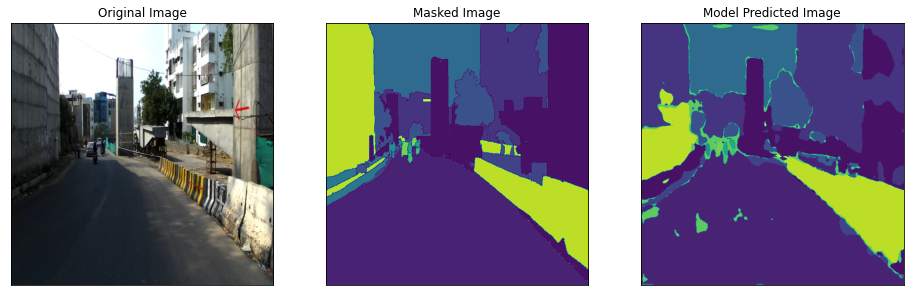

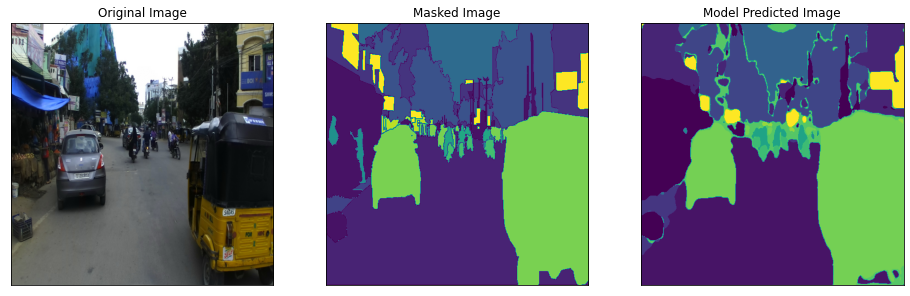

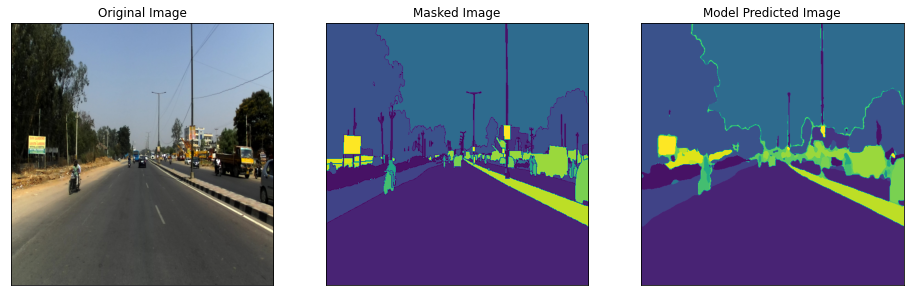

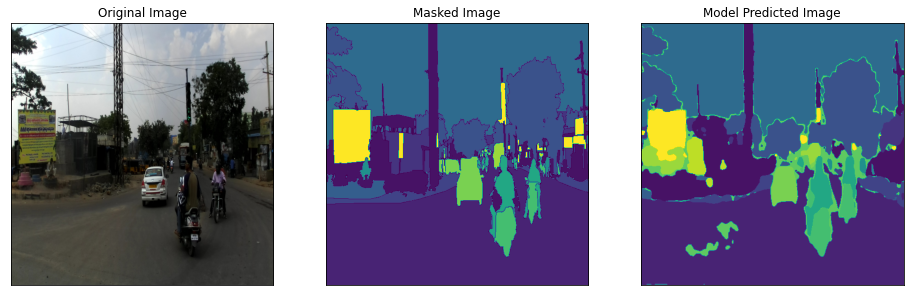

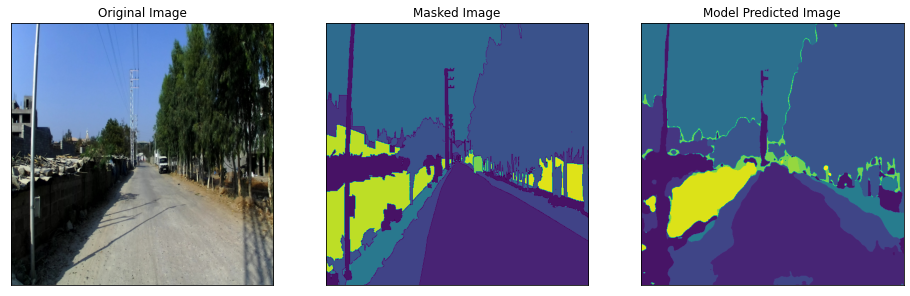

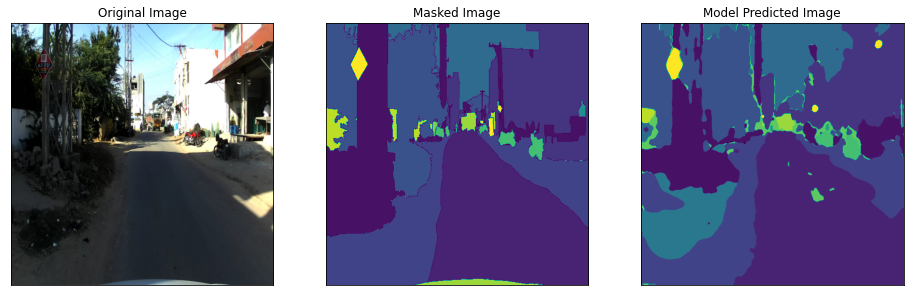

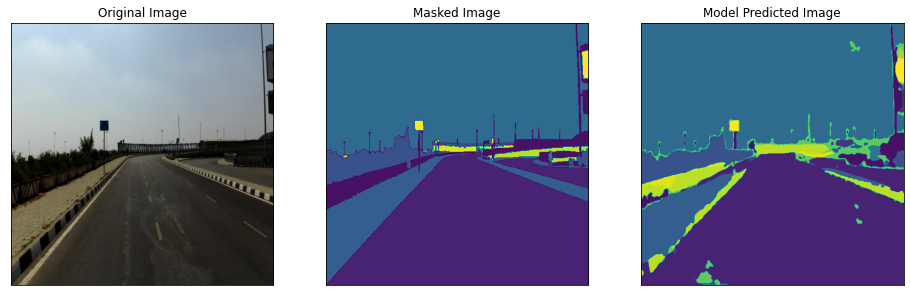

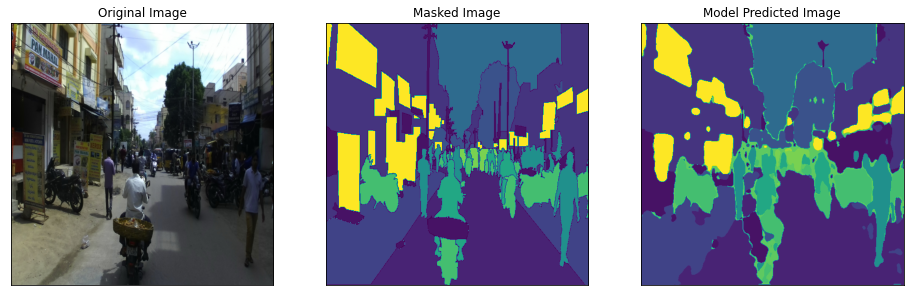

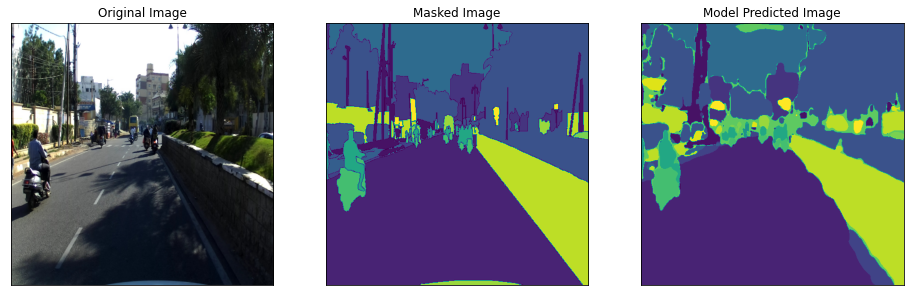

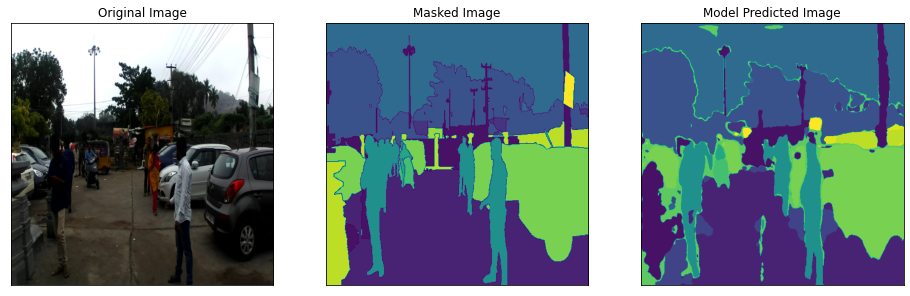

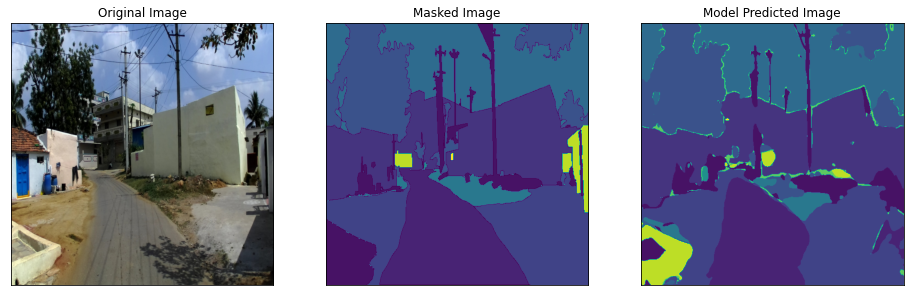

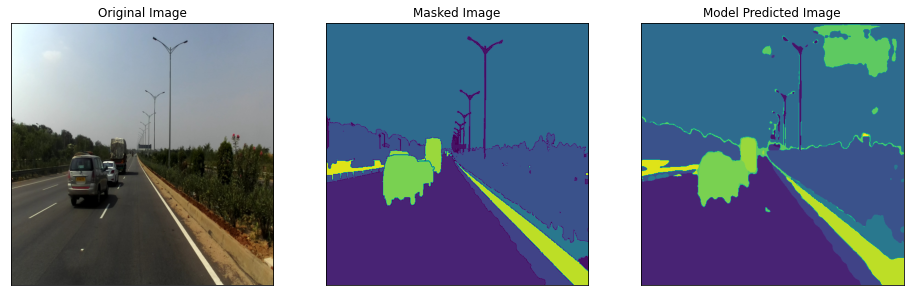

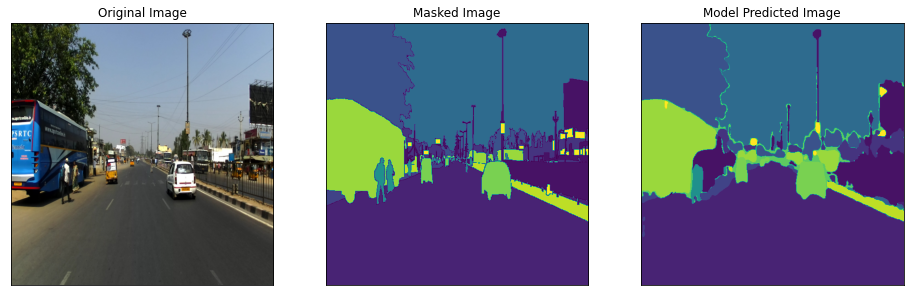

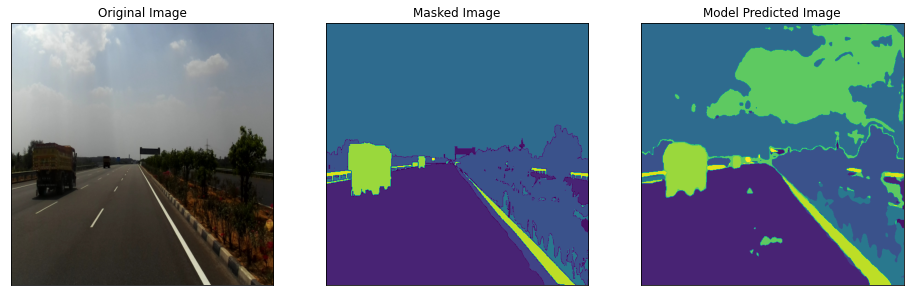

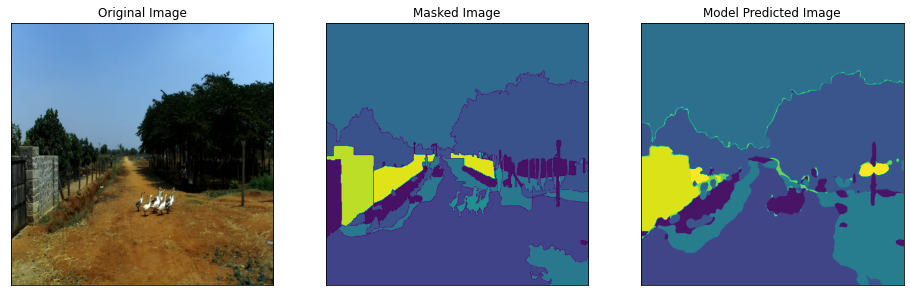

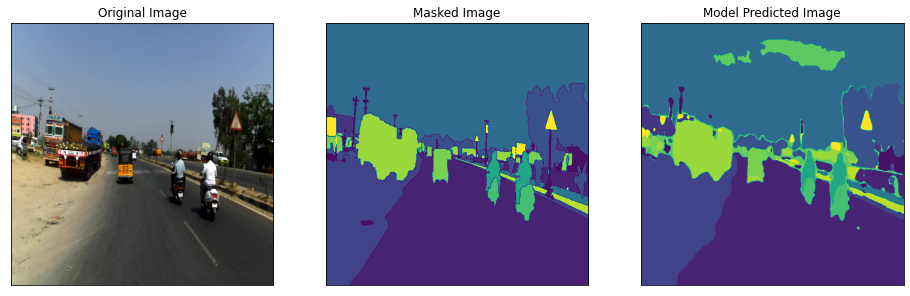

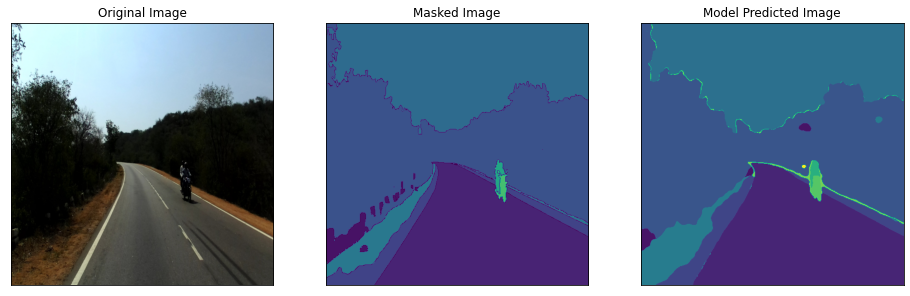

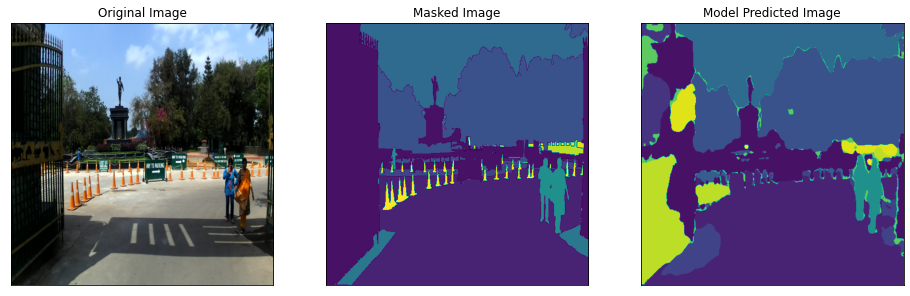

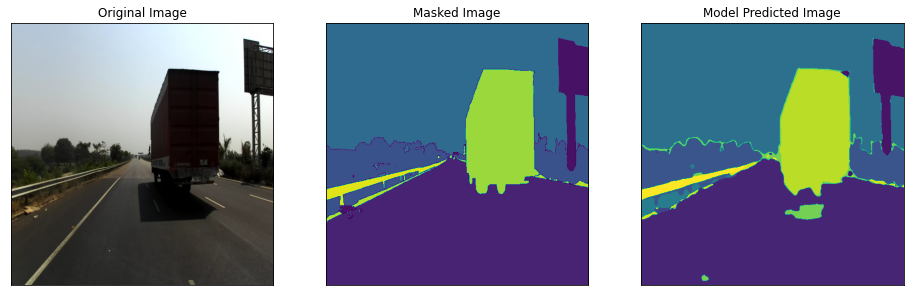

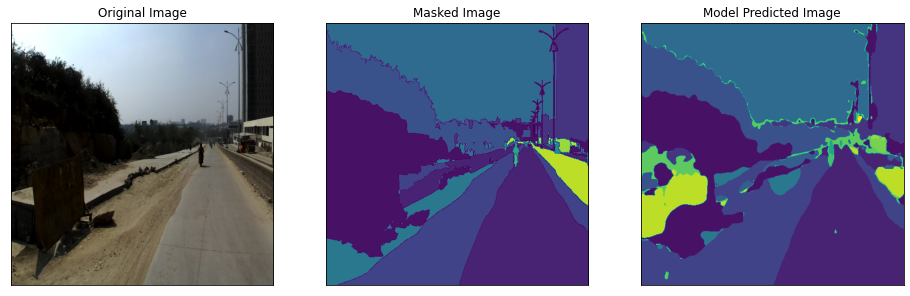

In [ ]:
plot_model_predicted_images(model_unet,20)

# Task 3: Training CANet

In [19]:
import tensorflow as tf
# tf.compat.v1.enable_eager_execution()
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Multiply
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import glorot_uniform, he_normal, glorot_normal
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

* as a part of this assignment we will be implementing the architecture based on this paper https://arxiv.org/pdf/2002.12041.pdf
* We will be using the custom layers concept that we used in seq-seq assignment
* You can devide the whole architecture can be devided into two parts
    1. Encoder
    2. Decoder
    <img src='https://i.imgur.com/prH3Mno.png' width="600">
* Encoder:
    * The first step of the encoder is to create the channel maps [$C_1$, $C_2$, $C_3$, $C_4$]
    * $C_1$ width and heigths are 4x times less than the original image
    * $C_2$ width and heigths are 8x times less than the original image
    * $C_3$ width and heigths are 8x times less than the original image
    * $C_4$ width and heigths are 8x times less than the original image
    * <i>you can reduce the dimensions by using stride parameter</i>.
    * [$C_1$, $C_2$, $C_3$, $C_4$] are formed by applying a "conv block" followed by $k$ number of "identity block". i.e the $C_k$ feature map will single "conv block" followed by $k$ number of "identity blocks".
    <table>
    <tr><td><img src="https://i.imgur.com/R8Gdypo.png" width="300"></td>
        <td><img src="https://i.imgur.com/KNunjQK.png" width="250"></td></tr>
    </table>
    * <strong>The conv block and identity block of $C_1$</strong>: the number filters in the covolutional layers will be $[4,4,8]$ and the number of filters in the parallel conv layer will also be $8$.
    * <strong>The conv block and identity block of $C_2$</strong>: the number filters in the covolutional layers will be $[8,8,16]$ and the number of filters in the parallel conv layer will also be $16$.
    * <strong>The conv block and identity block of $C_3$</strong>: the number filters in the covolutional layers will be $[16,16,32]$ and the number of filters in the parallel conv layer will also be $32$.
    * <strong>The conv block and identity block of $C_4$</strong>: the number filters in the covolutional layers will be $[32,32,64]$ and the number of filters in the parallel conv layer will also be $64$.
    * Here $\oplus$ represents the elementwise sum
    <br>
    
    <font color="red">NOTE: these filters are of your choice, you can explore more options also</font>
    
    * Example: if your image is of size $(512, 512, 3)$
        * the output after $C_1$ will be $128*128*8$
        * the output after $C_2$ will be $64*64*16$
        * the output after $C_3$ will be $64*64*32$
        * the output after $C_4$ will be $64*64*64$

In [20]:
class convolutional_block(tf.keras.layers.Layer):
    def __init__(self, kernel=3,  filters=[4,4,8], stride=1, name="conv_block"):
        super().__init__(name=name)
        self.F1, self.F2, self.F3 = filters
        self.kernel = kernel
        self.stride = stride
        self.convres = Conv2D(self.F3, (3, 3), self.stride, padding='same')
        self.conv1 = Conv2D(self.F1, (1, 1), padding='same')
        self.conv2 = Conv2D(self.F2, (3, 3), self.stride, padding='same')
        self.conv3 = Conv2D(self.F3, (1, 1), padding='same')
        self.bnorm_res = BatchNormalization()
        self.bnorm_1 = BatchNormalization()
        self.bnorm_2 = BatchNormalization()
        self.bnorm_3 = BatchNormalization()
        self.act_relu = Activation('relu')

    def call(self, X):
        # write the architecutre that was mentioned above
        res = self.convres(X)
        res = self.bnorm_res(res)
        res = self.act_relu(res)

        conv = self.conv1(X)
        conv = self.bnorm_1(conv)
        conv = self.act_relu(conv)

        conv = self.conv2(conv)
        conv = self.bnorm_2(conv)
        conv = self.act_relu(conv)

        conv = self.conv3(conv)
        conv = self.bnorm_3(conv)

        X = add([res, conv])
        X = self.act_relu(X)
        return X

In [21]:
class identity_block(tf.keras.layers.Layer):
    def __init__(self, kernel=3,  filters=[4,4,8], name="identity block"):
        super().__init__(name=name)
        self.F1, self.F2, self.F3 = filters
        self.kernel = kernel
        self.conv1 = Conv2D(self.F1, (1, 1), padding='same')
        self.conv2 = Conv2D(self.F2, (3, 3), padding='same')
        self.conv3 = Conv2D(self.F3, (1, 1), padding='same')
        self.bnorm_1 = BatchNormalization()
        self.bnorm_2 = BatchNormalization()
        self.bnorm_3 = BatchNormalization()
        self.act_relu = Activation('relu')
    def call(self, X):
        # write the architecutre that was mentioned above
        identity_block=self.conv1(X)
        identity_block=self.bnorm_1(identity_block)
        identity_block=self.act_relu(identity_block)

        identity_block=self.conv2(identity_block)
        identity_block=self.bnorm_2(identity_block)
        identity_block=self.act_relu(identity_block)

        identity_block=self.conv3(identity_block)
        identity_block=self.bnorm_3(identity_block)

        X=add([identity_block,X])
        X=self.act_relu(X)
        return X

* The output of the $C_4$ will be passed to $\text{Chained Context Aggregation Module (CAM)}$
<img src='https://i.imgur.com/Bu63AAA.png' width="400">
* The CAM module will have two operations names Context flow and Global flow
* <strong>The Global flow</strong>: 
    * as shown in the above figure first we willl apply  <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling2D">global avg pooling</a> which results in (#, 1, 1, number_of_filters) then applying <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization?version=nightly">BN</a>, <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU">RELU</a>, $1*1 \text{ Conv}$ layer sequentially which results a matrix (#, 1, 1, number_of_filters). Finally apply <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D">upsampling</a> / <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose">conv2d transpose</a> to make the output same as the input dimensions (#, input_height, input_width, number_of_filters)
    * If you use <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D">upsampling</a> then use bilinear pooling as interpolation technique
* <strong>The Context flow</strong>: 
    * as shown in the above figure (c) the context flow will get inputs from two modules `a. C4` `b. From the above flow` 
    * We will be <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate">concatinating</a> the both inputs on the last axis.
    * After the concatination we will be applying <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D"> Average pooling </a> which reduces the size of feature map by $N\times$ times
    * In the paper it was mentioned that to apply a group convolutions, but for the assignment we will be applying the simple conv layers with kernel size $(3*3)$
    * We are skipping the channel shuffling 
    * similarly we will be applying a simple conv layers with kernel size $(3*3)$ consider this output is X
    * later we will get the Y=(X $\otimes \sigma((1\times1)conv(relu((1\times1)conv(X))))) \oplus X$, here $\oplus$ is elementwise addition and $\otimes$ is elementwise multiplication
    * Finally apply <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D">upsampling</a> / <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose">conv2d transpose</a> to make the output same as the input dimensions (#, input_height, input_width, number_of_filters)
    * If you use <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D">upsampling</a> then use bilinear pooling as interpolation technique

NOTE: here N times reduction and N time increments makes the input and out shape same, you can explore with the N values, you can choose N = 2 or 4

* Example with N=2:
    * Assume the C4 is of shape (64,64,64) then the shape of GF will be (64,64,32)
    * Assume the C4 is of shape (64,64,64) and the shape of GF is (64,64,32) then the shape of CF1 will be (64,64,32)
    * Assume the C4 is of shape (64,64,64) and the shape of CF1 is (64,64,32) then the shape of CF2 will be (64,64,32)
    * Assume the C4 is of shape (64,64,64) and the shape of CF2 is (64,64,32) then the shape of CF3 will be (64,64,32)

In [22]:
class global_flow(tf.keras.layers.Layer):
    def __init__(self,kernel = 64, filters = 64, name="global_flow"):
        super().__init__(name=name)
        self.kernel = kernel
        self.filters = filters
        self.globalavgpool = GlobalAveragePooling2D()
        self.conv = Conv2D(self.filters,
                           (1,1),
                           padding = 'same',
                           activation = 'relu')
        self.upsampling = UpSampling2D(size = (self.kernel,self.kernel),
                                       interpolation = 'bilinear')
        self.bnorm = BatchNormalization()
        self.act_relu = Activation('relu')
    def call(self, X):
        # implement the global flow operatiom
        X = self.globalavgpool(X)
        X = tf.expand_dims(X, axis = 1)
        X = tf.expand_dims(X, axis = 1)
        X = self.bnorm(X)
        X = self.act_relu(X)

        X = self.conv(X)
        X = self.upsampling(X)

        return X

In [23]:
class context_flow(tf.keras.layers.Layer):    
    def __init__(self, filters = 32, name="context_flow"):
        super().__init__(name=name)
        self.filters = filters
        self.avgpooling = AveragePooling2D(strides = 2,
                                          padding = 'same')
        self.conv1 = Conv2D(self.filters,
                            (3,3),
                            padding = 'same',
                            activation = 'relu')
        self.conv2 = Conv2D(self.filters,
                            (3,3),
                            padding = 'same',
                            activation = 'relu')
        self.conv3 = Conv2D(self.filters,
                            (1,1),
                            padding = 'same',
                            activation = 'relu')
        self.conv4 = Conv2D(self.filters,
                            (1,1),
                            padding = 'same')
        self.upsampling = UpSampling2D(size  = (2,2),
                                     interpolation = 'bilinear')
        self.act_relu = Activation('relu')
        self.act_sigmoid = Activation('sigmoid')

    def call(self, X):
        # here X will a list of two elements 
        INP, FLOW = X[0], X[1] 
        # implement the context flow as mentioned in the above cell
        X = concatenate([INP,FLOW])
        X = self.avgpooling(X)
        
        X = self.conv1(X)
        X = self.conv2(X)
        
        X1 = self.conv3(X)
        X1 = self.act_relu(X1)
        X1 = self.conv4(X1)
        X1 = self.act_sigmoid(X1)

        X2 = multiply([X,X1])
        X3 = add([X,X2])

        X = self.upsampling(X3)
        return X

* As shown in the above architecture we will be having 4 context flows
* if you have implemented correctly all the shapes of Global Flow, and 3 context flows will have the same dimension
* the output of these 4 modules will be <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Add">added</a> to get the same output matrix
<img src='https://i.imgur.com/Bu63AAA.png' width="400">
 * The output of after the sum, will be sent to the <strong>Feature selection module $FSM$</strong>
 
* Example:
    * if the shapes of GF, CF1, CF2, CF3 are (64,64,32), (64,64,32), (64,64,32), (64,64,32), (64,64,32) respectivly then after the sum we will be getting (64,64,32), which will be passed to the next module.
 
<strong>Feature selection module</strong>:

* As part of the FSM we will be applying a conv layer (3,3) with the padding="same" so that the output and input will have same shapes
* Let call the output as X
* Pass the X to global pooling which results the matrix (#, 1, 1, number_of_channels)
* Apply $1*1$ conv layer, after the pooling
* the output of the $1*1$ conv layer will be passed to the Batch normalization layer, followed by Sigmoid activation function.
* we will be having the output matrix of shape (#, 1, 1, number_of_channels) lets call it 'Y'
* <strong>we can interpret this as attention mechanisum, i.e for each channel we will having a weight</strong>
* the dimension of X (#, w, h, k) and output above steps Y is (#, 1, 1, k) i.e we need to multiply each channel of X will be <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Multiply">multiplied</a> with corresponding channel of Y
* After creating the weighted channel map we will be doing upsampling such that it will double the height and width.
* apply <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D">upsampling</a> with bilinear pooling as interpolation technique

* <font color="red">Example</font>:
    * Assume the matrix shape of the input is (64,64,32) then after upsampling it will be (128,128,32)

In [24]:
class fsm(tf.keras.layers.Layer):    
    def __init__(self,filters = 32, name="feature_selection"):
        super().__init__(name=name)
        self.conv1 = Conv2D(filters,
                            (3,3),
                            padding = 'same')
        self.conv2 = Conv2D(filters,
                            (1,1),
                            padding = 'same')
        self.globalmaxpool = GlobalMaxPool2D()
        self.bnorm = BatchNormalization()
        self.upsampling = UpSampling2D(size = (2,2),
                                     interpolation = 'bilinear')
        self.act_sigmoid = Activation('sigmoid')
        
        
    def call(self, X):
        # implement the FSM modules based on image in the above cells
        X = self.conv1(X)
        
        X1 = self.globalmaxpool(X)
        X1 = tf.expand_dims(X1, axis = 1)
        X1 = tf.expand_dims(X1, axis = 1)
        X1 = self.conv2(X1)
        X1 = self.bnorm(X1)
        X1 = self.act_sigmoid(X1)

        X2 = multiply([X,X1])

        FSM_Conv_T = self.upsampling(X2)

        return FSM_Conv_T

* <b>Adapted Global Convolutional Network (AGCN)</b>:
    <img src="https://i.imgur.com/QNB8RmV.png" width="300">
    
    * AGCN will get the input from the output of the "conv block" of $C_1$
    
    * In all the above layers we will be using the padding="same" and stride=(1,1)
    
    * so that we can have the input and output matrices of same size
    
* <font color="red">Example</font>:
    * Assume the matrix shape of the input is (128,128,32) then the output it will be (128,128,32)

In [25]:
class agcn(tf.keras.layers.Layer):    
    def __init__(self,filters = 32, name="global_conv_net"):
        super().__init__(name=name)
        self.conv1 = Conv2D(filters,
                            (7,1),
                            padding = 'same',
                            activation = 'relu')
        self.conv2 = Conv2D(filters,
                            (1,7),
                            padding = 'same',
                            activation = 'relu')
        self.conv3 = Conv2D(filters,
                            (1,7),
                            padding = 'same',
                            activation = 'relu')
        self.conv4 = Conv2D(filters,
                            (7,1),
                            padding = 'same',
                            activation = 'relu')
        self.conv5 = Conv2D(filters,
                            (3,3),
                            padding = 'same',
                            activation = 'relu')
        
        
    def call(self, X):
        # please implement the above mentioned architecture
        X1 = self.conv1(X)
        X1 = self.conv2(X1)
        
        X2 = self.conv3(X)
        X2 = self.conv4(X2)
        
        X3 = add([X1,X2])
        X4 = self.conv5(X3)
        
        X = add([X3,X4])
        return X

*     <img src='https://i.imgur.com/prH3Mno.png' width="600">
* as shown in the architecture, after we get the AGCN it will get concatinated with the FSM output

* If we observe the shapes both AGCN and FSM will have same height and weight

* we will be concatinating both these outputs over the last axis

* The concatinated output will be passed to a conv layers with filters = number of classes in our data set and the activation function = 'relu'

* we will be using padding="same" which results in the same size feature map

* If you observe the shape of matrix, it will be 4x times less than the original image

* to make it equal to the original output shape, we will do 4x times upsampling of rows and columns

* apply <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D">upsampling</a> with bilinear pooling as interpolation technique

* Finally we will be applying sigmoid activation.

* Example:
    * Assume the matrix shape of AGCN is (128,128,32)  and FSM is (128,128,32) the concatination will make it (128, 128, 64)
    * Applying conv layer will make it (128,128,21)
    * Finally applying upsampling will make it (512, 512, 21)
    * Applying sigmoid will result in the same matrix (512, 512, 21)

In [26]:
#splitting the data into train and validation
df_train, df_val = train_test_split(data_df, test_size = 0.12 , random_state = 33)

In [27]:
#defining the augmentors
def augmentation():
    '''
    Function to get the augmentors
    '''
    aug1 = iaa.Fliplr(1)
    aug2 = iaa.DirectedEdgeDetect(alpha=(0.8), direction=(1.0))
    aug3 = iaa.Emboss(alpha=1, strength=1)
    aug4 = iaa.Sharpen(alpha=1, lightness=1)

    return aug1, aug2, aug3, aug4

aug1, aug2, aug3, aug4 = augmentation()

#we need to prepare the dataset now
def normalize_image(img):
    img = img / 255.

class Dataset:

    class_labels = list(set(label_clr.values()))

    def __init__(self, images_paths, training=True, w=512, h=512):

        self.original_image = images_paths.image.values
        self.output_image = images_paths['mask'].values
        self.classes = self.class_labels
        self.w = w
        self.h = h
        self.training = training

    def __getitem__(self, i):

        input_image = cv2.imread(self.original_image[i], cv2.IMREAD_UNCHANGED)
        mask_image = cv2.imread(self.output_image[i], cv2.IMREAD_UNCHANGED)
        input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

        #resizing both the images
        input_image = cv2.resize(input_image, (self.w, self.h),
                                 interpolation=cv2.INTER_AREA)
        mask_image = cv2.resize(mask_image, (self.w, self.h),
                                interpolation=cv2.INTER_AREA)
        
        #image augmentation
        aug_chooser = np.random.uniform(0, 1)

        aug_list = [aug1, aug2, aug3, aug4]

        if aug_chooser < 0.25:
            aug = 0
        elif aug_chooser < 0.5:
            aug = 1
        elif aug_chooser < 0.75:
            aug = 2
        else:
            aug = 3
        
        if self.training:
            input_image = aug_list[aug].augment_image(input_image)
            mask_image = aug_list[aug].augment_image(mask_image)

        #onehotencoding the masked image
        mask_image_onehot = [(mask_image == label) for label in self.classes]
        mask_image_onehot = np.stack(mask_image_onehot,axis=-1).astype('float64')

        #normalizing the values of image
        input_image = input_image / 255.

        return input_image, mask_image_onehot

    def __len__(self):
        return len(self.original_image)

In [28]:
#Now we need to make a datagenerator
class DataLoader(tf.keras.utils.Sequence):
    def __init__(self, dataset, batch_size):
        self.dataset = dataset
        self.batch_size = batch_size

    def __getitem__(self, i):
        # collect batch data
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])

        batch = [np.stack(sample, axis=0) for sample in zip(*data)]
        return tuple(batch)

    def __len__(self):
        return len(self.dataset) // self.batch_size

In [29]:
X_input = Input(shape=(512,512,3))

# Stage 1
X = Conv2D(256, (3, 3), name='conv1', padding="same", kernel_initializer=glorot_uniform(seed=0))(X_input)
X = BatchNormalization(axis=3, name='bn_conv1')(X)
X = Activation('selu')(X)
X = MaxPooling2D((2, 2), strides=(2, 2))(X)

#C1 block
X = convolutional_block(filters=[32, 32, 64], stride=2, name='conv_block_1')(X)
C1 = identity_block(filters=[32, 32, 64], name='identity_block_1')(X)

#C2 block

X = convolutional_block(filters=[64, 64, 128], stride=2,
                        name='conv_block_2')(C1)
for i in range(2):
    X = identity_block(filters=[64, 64, 128],
                       name='identity_block_2' + str(i))(X)

#C3 block

X = convolutional_block(filters=[128, 128, 256], stride=1,
                        name='conv_block_3')(X)
for i in range(3):
    X = identity_block(filters=[128, 128, 256],
                       name='identity_block_3' + str(i))(X)

#C4 block

X = convolutional_block(filters=[256, 256, 512], stride=1,
                        name='conv_block_4')(X)
for i in range(4):
    X = identity_block(filters=[256, 256, 512],
                       name='identity_block_4' + str(i))(X)

#flow blocks
GF = global_flow(kernel=X.shape[1], filters=256)(X)

num_filters = GF.shape[-1]
CF1 = context_flow(filters=256, name='context_flow_1')([X, GF])
CF2 = context_flow(filters=256, name='context_flow_2')([X, CF1])
CF3 = context_flow(filters=256, name='context_flow_3')([X, CF2])

X = add([GF, CF1, CF2, CF3])

#FSM
X = fsm(filters=256)(X)

#AGCN and Concat

AGCN = agcn(filters=256)(C1)
X = concatenate([X, AGCN])

#final (3x3) convolution
X = Dropout(0.1)(X)
X = Conv2D(256, (3, 3), padding='same',activation='selu',
               kernel_initializer='lecun_normal',bias_initializer='lecun_normal')(X)
X = Dropout(0.1)(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)
X = Conv2D(21, (3, 3), padding='same')(X)
X = UpSampling2D(size=(4, 4), interpolation='bilinear')(X)
output = Activation('softmax')(X)

print(X.shape)

(None, 512, 512, 21)


* If you observe the arcitecture we are creating a feature map with 2x time less width and height
* we have written the first stage of the code above.
* Write the next layers by using the custom layers we have written

In [30]:
# write the complete architecutre

model_CANet = Model(inputs = X_input, outputs = output)

model_CANet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 512, 512, 256 7168        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 512, 512, 256 1024        conv1[0][0]                      
__________________________________________________________________________________________________
activation (Activation)         (None, 512, 512, 256 0           bn_conv1[0][0]                   
______________________________________________________________________________________________

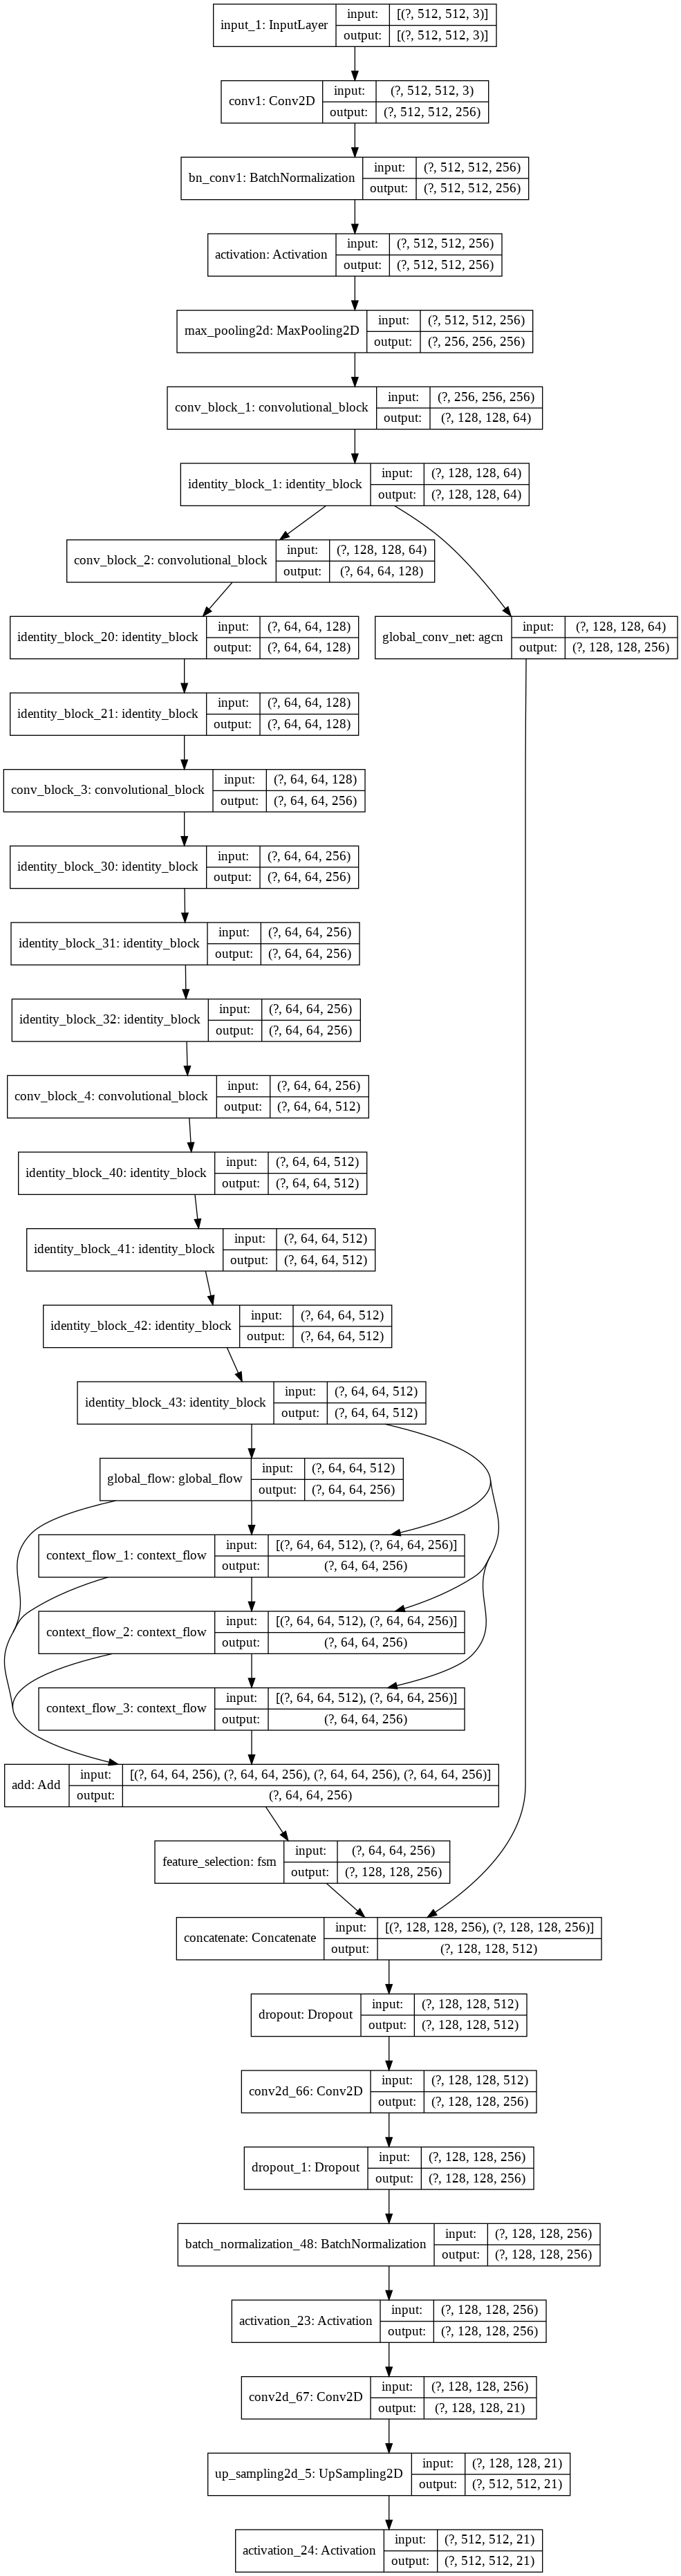

In [31]:
tf.keras.utils.plot_model(
    model_CANet, to_file='model4.png', show_shapes=True, show_layer_names=True,
    rankdir='TB')

### Usefull tips:
* use "interpolation=cv2.INTER_NEAREST" when you are resizing the image, so that it won't mess with the number of classes
* keep the images in the square shape like $256*256$ or $512*512$
* Carefull when you are converting the (W, H) output image into (W, H, Classes)
* Even for the canet, use the segmentation model's losses and the metrics
* The goal of this assignment is make you familier in with computer vision problems, image preprocessing, building complex architectures and implementing research papers, so that in future you will be very confident in industry
* you can use the tensorboard logss to see how is yours model's training happening
* use callbacks that you have implemented in previous assignments

In [32]:
!rm -rf ./logs/
logdir=os.path.join("logs",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [33]:
# https://github.com/qubvel/segmentation_models
import segmentation_models as sm
from segmentation_models.metrics import iou_score
from segmentation_models import Unet
iou_score = sm.metrics.IOUScore(threshold=0.5)
optim = tf.keras.optimizers.Adam(0.0001)
focal_loss = sm.losses.dice_loss
#iou_score = sm.metrics.IOUScore(threshold=0.5)
model_CANet.compile(optim, focal_loss, metrics=[iou_score])

In [34]:
train_dataset = Dataset(df_train)
val_dataset = Dataset(df_val,training = False)

batch_size = 4
train_dataloader = DataLoader(train_dataset, batch_size)
val_dataloader = DataLoader(val_dataset, batch_size)

In [36]:
history = model_CANet.fit(train_dataloader, 
                          validation_data = val_dataloader, 
                          epochs = 3, 
                          steps_per_epoch = len(train_dataloader))

Epoch 1/3
881/881 [==============================] - 1380s 2s/step - loss: 0.7890 - iou_score: 0.1714 - val_loss: 0.7870 - val_iou_score: 0.2576
Epoch 2/3
881/881 [==============================] - 1376s 2s/step - loss: 0.7285 - iou_score: 0.2117 - val_loss: 0.7514 - val_iou_score: 0.2377
Epoch 3/3
881/881 [==============================] - 1373s 2s/step - loss: 0.7018 - iou_score: 0.2317 - val_loss: 0.7140 - val_iou_score: 0.3449


In [37]:
#defining the loss
focal_loss = sm.losses.categorical_focal_dice_loss
#defining the optimizer
optim = tf.keras.optimizers.Adam(learning_rate = 0.00005)
#compiling the model
model_CANet.compile(optim, focal_loss, metrics = [iou_score])
history = model_CANet.fit(train_dataloader, 
                          validation_data = val_dataloader,
                          initial_epoch = 3, 
                          epochs = 6, 
                          steps_per_epoch = len(train_dataloader))

Epoch 4/6
881/881 [==============================] - 1410s 2s/step - loss: 0.6922 - iou_score: 0.2542 - val_loss: 0.6983 - val_iou_score: 0.3452
Epoch 5/6
881/881 [==============================] - 1409s 2s/step - loss: 0.6784 - iou_score: 0.2653 - val_loss: 0.6805 - val_iou_score: 0.3684
Epoch 6/6
881/881 [==============================] - 1410s 2s/step - loss: 0.6666 - iou_score: 0.2735 - val_loss: 0.6847 - val_iou_score: 0.3323


In [39]:
#defining the loss
focal_loss = sm.losses.categorical_focal_dice_loss
#defining the optimizer
optim = tf.keras.optimizers.Adam(learning_rate = 0.00001)
#compiling the model
model_CANet.compile(optim, focal_loss, metrics = [iou_score])
history = model_CANet.fit(train_dataloader, 
                          validation_data = val_dataloader,
                          initial_epoch = 6, 
                          epochs = 9, 
                          steps_per_epoch = len(train_dataloader))

Epoch 7/9
881/881 [==============================] - 1412s 2s/step - loss: 0.6501 - iou_score: 0.2879 - val_loss: 0.6539 - val_iou_score: 0.3546
Epoch 8/9
881/881 [==============================] - 1410s 2s/step - loss: 0.6448 - iou_score: 0.2929 - val_loss: 0.6478 - val_iou_score: 0.3666
Epoch 9/9
881/881 [==============================] - 1408s 2s/step - loss: 0.6423 - iou_score: 0.2947 - val_loss: 0.6468 - val_iou_score: 0.3833


In [40]:
#defining the loss
focal_loss = sm.losses.categorical_focal_dice_loss
#defining the optimizer
optim = tf.keras.optimizers.Adam(learning_rate = 0.000005)
#compiling the model
model_CANet.compile(optim, focal_loss, metrics = [iou_score])
history = model_CANet.fit(train_dataloader, 
                          validation_data = val_dataloader,
                          initial_epoch = 9, 
                          epochs = 12, 
                          steps_per_epoch = len(train_dataloader))

Epoch 10/12
881/881 [==============================] - 1404s 2s/step - loss: 0.6388 - iou_score: 0.2983 - val_loss: 0.6437 - val_iou_score: 0.3757
Epoch 11/12
881/881 [==============================] - 1402s 2s/step - loss: 0.6342 - iou_score: 0.3017 - val_loss: 0.6424 - val_iou_score: 0.3733
Epoch 12/12
881/881 [==============================] - 1407s 2s/step - loss: 0.6348 - iou_score: 0.3020 - val_loss: 0.6412 - val_iou_score: 0.3620


In [ ]:
#defining the loss
focal_loss = sm.losses.categorical_focal_dice_loss
#defining the optimizer
optim = tf.keras.optimizers.Adam(learning_rate = 0.000001)
#compiling the model
model_CANet.compile(optim, focal_loss, metrics = [iou_score])
history = model_CANet.fit(train_dataloader, 
                          validation_data = val_dataloader,
                          initial_epoch = 12, 
                          epochs = 15, 
                          steps_per_epoch = len(train_dataloader))

### Predicting some of the validation images

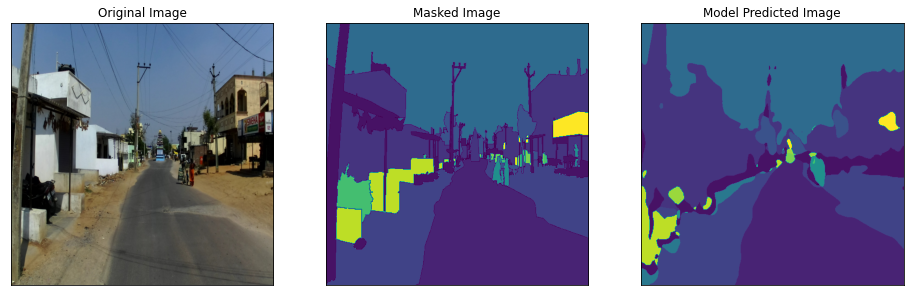

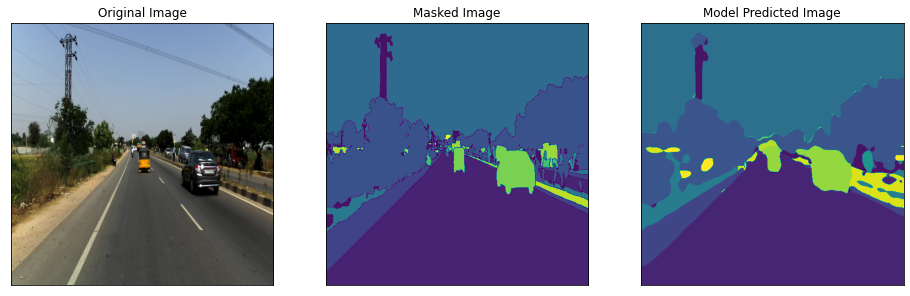

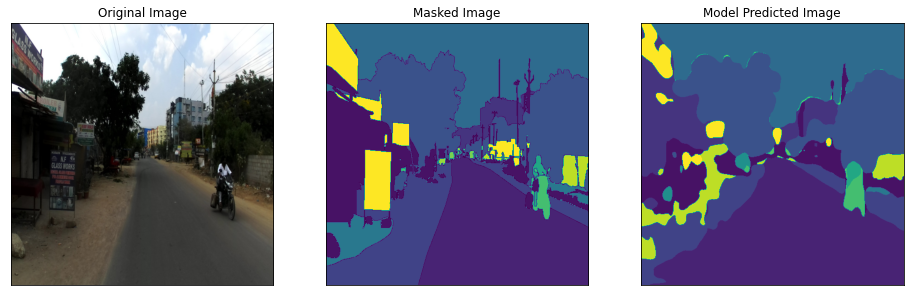

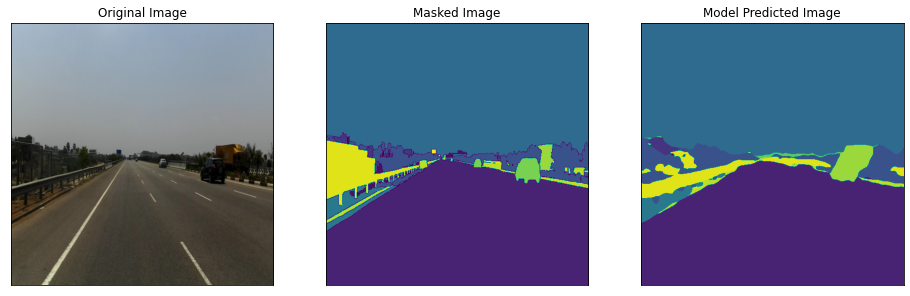

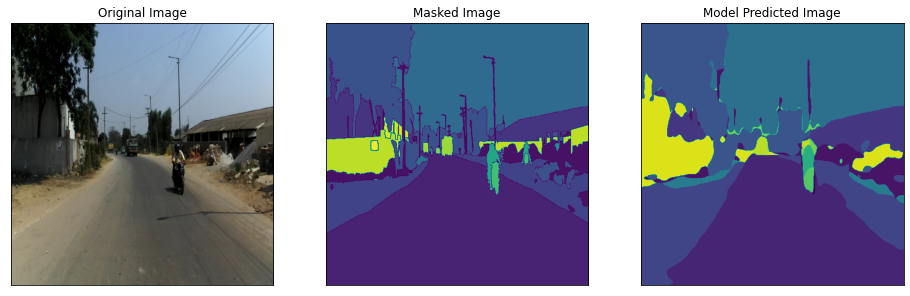

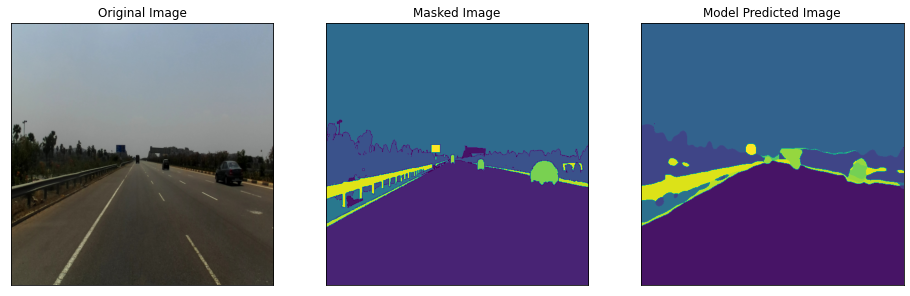

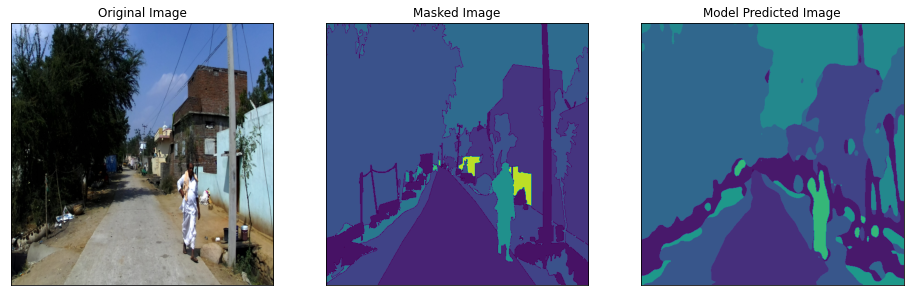

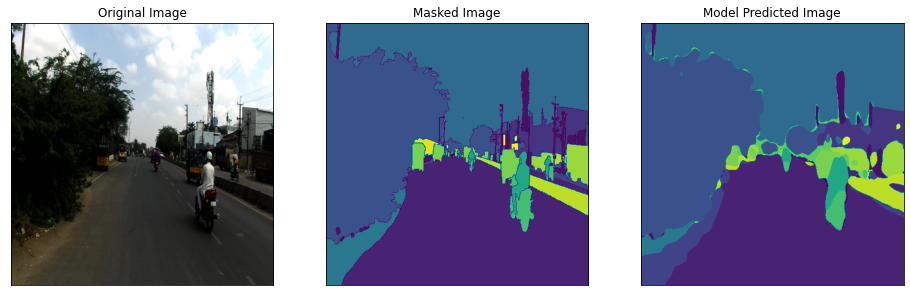

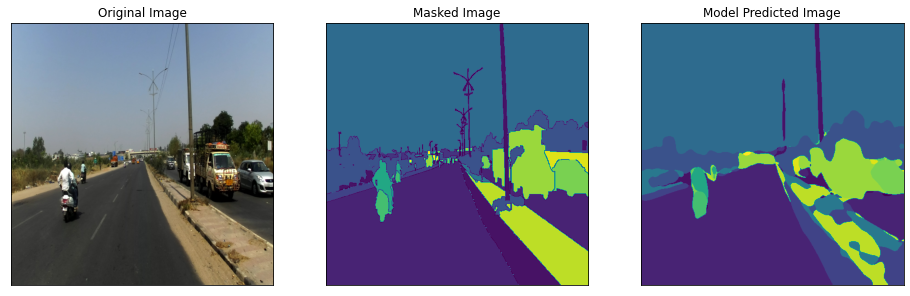

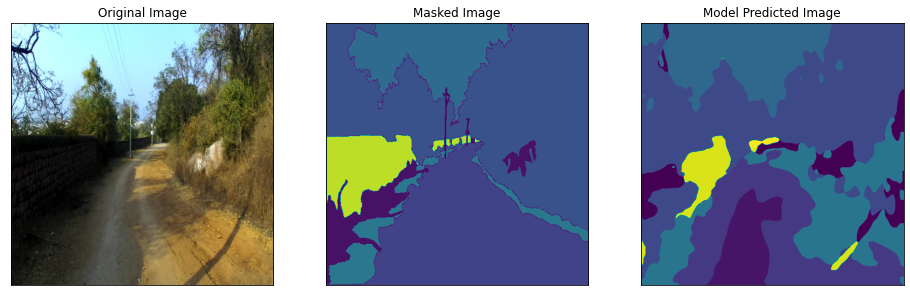

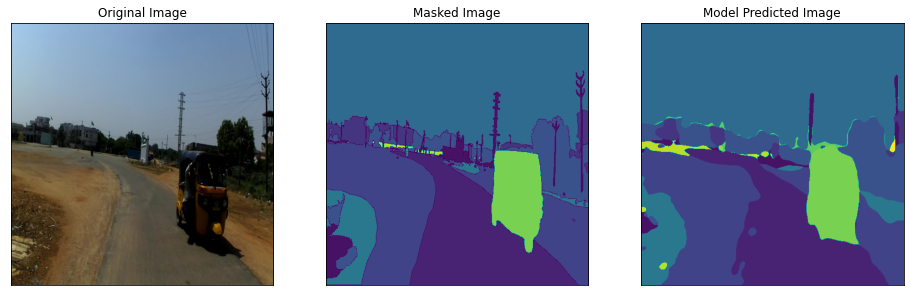

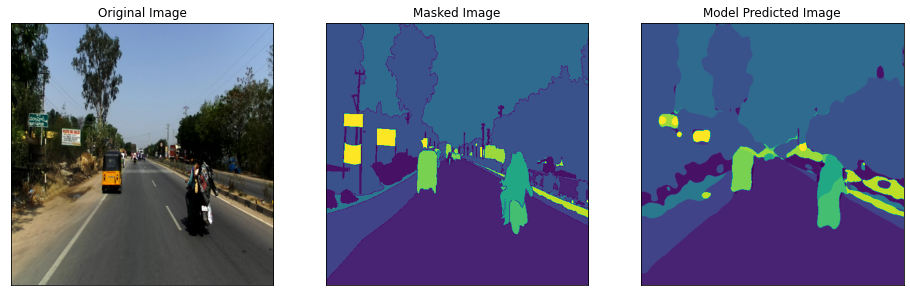

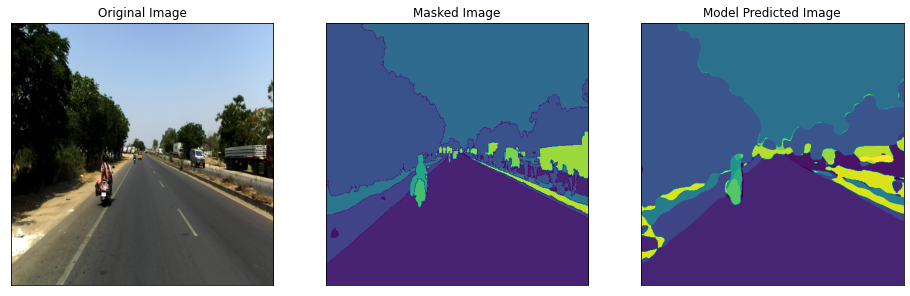

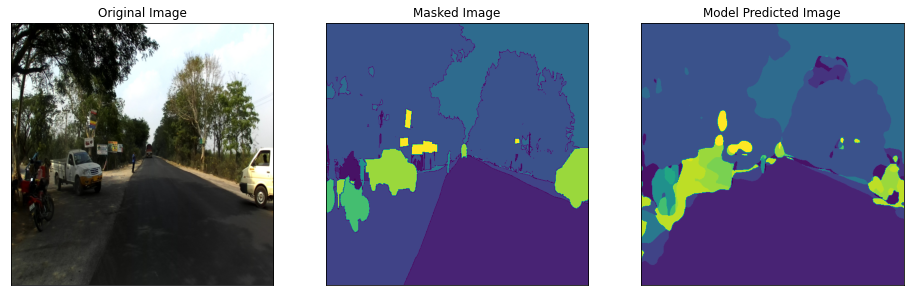

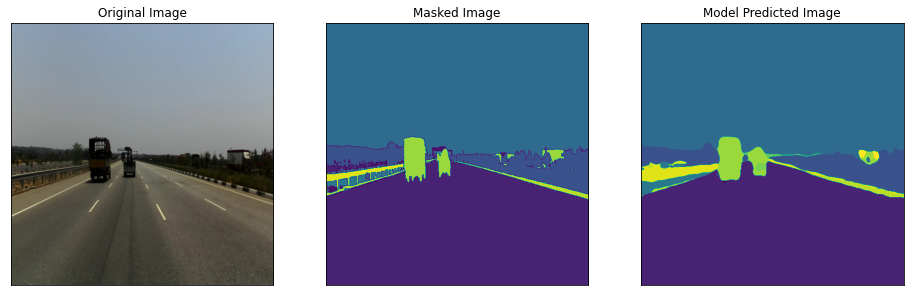

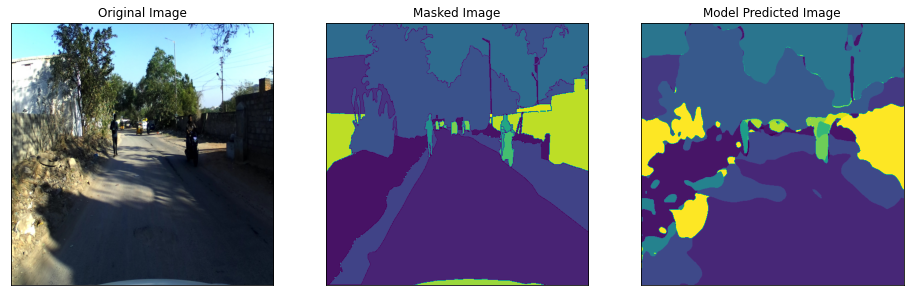

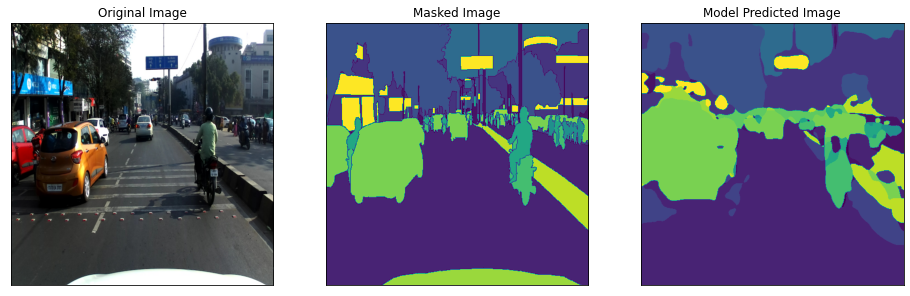

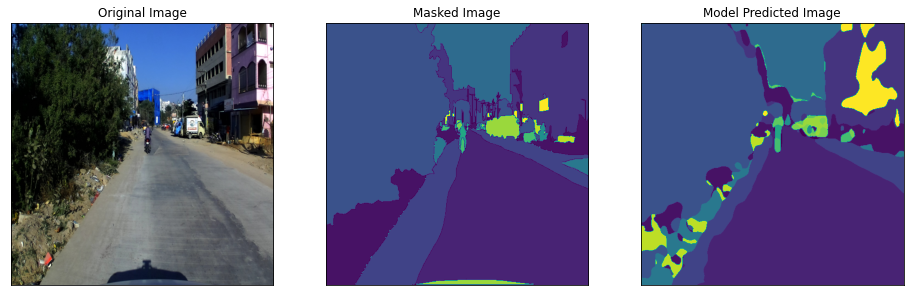

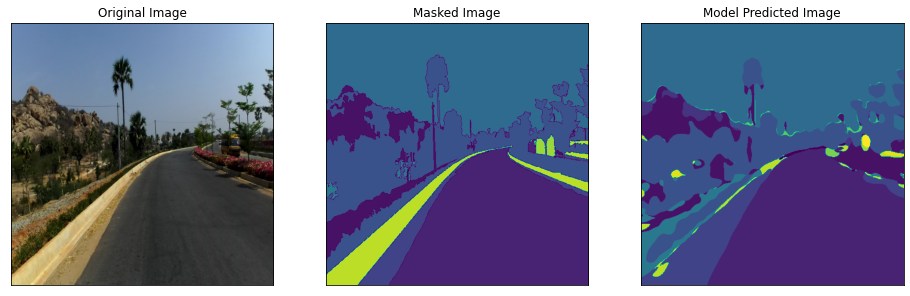

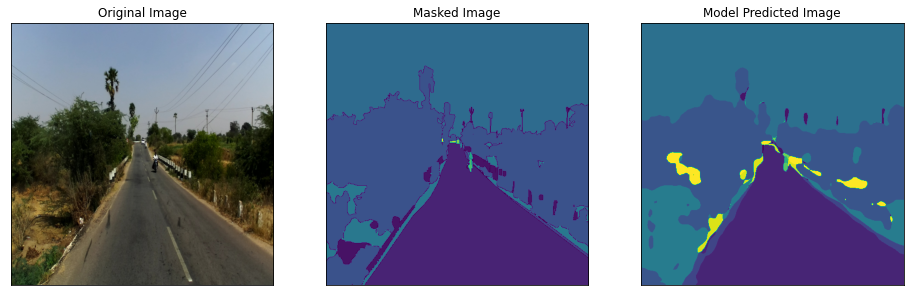

In [43]:
plot_model_predicted_images(model_CANet,20)

### Things to keep in mind

* You need to train  above built model and plot the train and test losses.
* Make sure there is no overfitting, you are free play with the identity blocks in C1, C2, C3, C4
* before we apply the final sigmoid activation, you can add more conv layers or BN or dropouts etc
* you are free to use any other optimizer or learning rate or weights init or regularizations

## Summary

For the task of image segmentation, we followed following steps:
<ol><li>First we created the masks of the original image, where every object was separated by filling it with different colour.
<li>There were 21 objects in total, so we had 21 different colours for masking.
<li>The mask will be helpful in calculating the loss and IOU Score as they are what we are trying to replicate/produce from the model, given an unsegmented Image.
<li>We split data into train and validation using a test size of 0.15, as we had less images.
<li>First we applied U-Net Model where the output had 21 channels, each channel for one object map. We obtained an IOU Score of 0.50.
<li>Some of the segmented images were plotted and compared with original masks, and the results seemed good.
<li>Next we used CANet Architecure, using which we got a validation IOU Score of close to 0.43. Some segmented images were plotted, but the results were not as good as U-Net.

In [44]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ['Model Architecure','Train IOU Score','Val IOU SCORE']
x.add_row(['U-Net','0.4226','0.5328'])
x.add_row(['CANet','0.2947','0.0.3833'])
print(x)

+-------------------+-----------------+---------------+
| Model Architecure | Train IOU Score | Val IOU SCORE |
+-------------------+-----------------+---------------+
|       U-Net       |      0.4226     |     0.5328    |
|       CANet       |      0.2947     |    0.0.3833   |
+-------------------+-----------------+---------------+
